In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:

def calc_Fq(q):
    radius = 0.5  # Set the radius of the sphere
    Pq = np.zeros_like(q)
    for i in range(len(q)):
        qr = q[i] * radius
        if qr < 1e-10:  # Handle the case when q is very close to 0
            Pq[i] = 1.0  # lim(q->0) P(q) = 1
        else:
            Pq[i] = (3.0 * (np.sin(qr) - qr * np.cos(qr))) / (qr * qr * qr)
    # Square the result to get the form factor
    Fq = Pq * Pq

    return Fq

def calc_pd_Fq(q,sigma):
    Fq = np.zeros_like(q)
    sum_V2 = 0.0
    for i in range(100):
        Pq = np.zeros_like(q)
        radius = 0.5 + np.random.normal(0, sigma)*0.5
        V = (4.0 / 3.0) * np.pi * radius**3
        V2 = V * V
        for i in range(len(q)):
            qr = q[i] * radius
            if qr < 1e-10:  # Handle the case when q is very close to 0
                Pq[i] = 1.0  # lim(q->0) P(q) = 1
            else:
                Pq[i] = (3.0 * (np.sin(qr) - qr * np.cos(qr))) / (qr * qr * qr)

        Fq += Pq * Pq*V2
        sum_V2 += V2
    Fq /= sum_V2
    return Fq

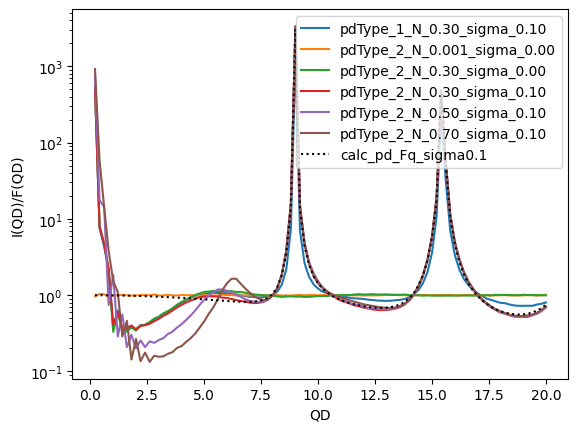

In [20]:
#data = np.loadtxt("../data/pdType_3_N_0.5_sigma_0.1/dump.000008000_Iq.txt",skiprows=1, delimiter=",")
#q, Iq = data[:, 0], data[:, 1]
files = ["../data/pdType_1_N_0.30_sigma_0.10/Iq.csv",
         "../data/pdType_2_N_0.001_sigma_0.00/Iq.csv",
          "../data/pdType_2_N_0.30_sigma_0.00/Iq.csv",
          "../data/pdType_2_N_0.30_sigma_0.10/Iq.csv",
          "../data/pdType_2_N_0.50_sigma_0.10/Iq.csv",
          "../data/pdType_2_N_0.70_sigma_0.10/Iq.csv"]
Fq = None
for i in range(len(files)):
    data = np.genfromtxt(files[i], delimiter=",")
    q, Iq = data[0,1:], data[1,1:]
    if(Fq is None):
        Fq =calc_Fq(q)
    plt.plot(q, Iq/Fq, label=files[i].split("/")[-2])
#plt.plot(q, calc_Fq(q), label="calc_Fq", linestyle='--', color='black')
plt.plot(q, calc_pd_Fq(q, 0.10)/Fq, label="calc_pd_Fq_sigma0.1", linestyle=':', color='black')
#plt.xscale('log')
plt.xlabel("QD")
plt.ylabel("I(QD)/F(QD)")
plt.legend()
plt.yscale('log')
plt.savefig("../data/Iq.pdf",format='pdf')
plt.show()

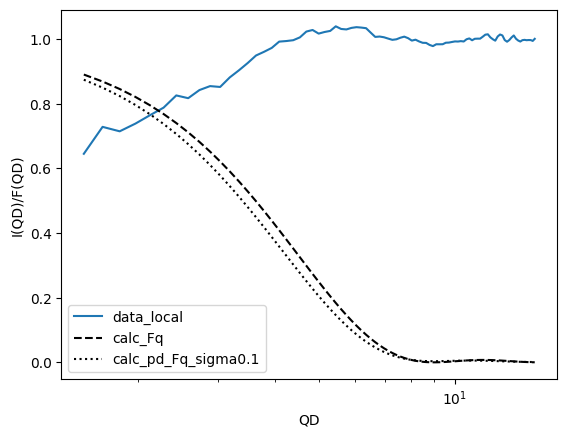

In [ ]:
#data = np.loadtxt("../data/pdType_3_N_0.5_sigma_0.1/dump.000008000_Iq.txt",skiprows=1, delimiter=",")
#q, Iq = data[:, 0], data[:, 1]
files = ["../data_local/L_5_pdType_2_N_0.10_sigma_0.00_Iq.csv"]
Fq = None
for i in range(len(files)):
    data = np.genfromtxt(files[i], delimiter=",")
    q, Iq = data[0,1:], data[1,1:]
    q , Iq = q[10:], Iq[10:]  # Skip the first element
    if(Fq is None):
        Fq =calc_Fq(q)
    plt.plot(q, Iq/Fq, label=files[i].split("/")[-2])
    plt.plot(q, Iq, label=files[i].split("/")[-2]+"Iq")

plt.plot(q, calc_Fq(q), label="calc_Fq", linestyle='--', color='black')
plt.plot(q, calc_pd_Fq(q, 0.10), label="calc_pd_Fq_sigma0.1", linestyle=':', color='black')
plt.xscale('log')
plt.xlabel("QD")
plt.ylabel("I(QD)/F(QD)")
plt.legend()
#plt.yscale('log')
plt.savefig("../data/Iq.pdf",format='pdf')
plt.show()